In [39]:
# load pandas and read the csv file from the url
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# I don't know why it takes so long to load the data
# df = pd.read_csv("https://github.com/krsoy/AAU_Projects/blob/Bitian/survey_results_public.csv")
df = pd.read_csv("https://media.githubusercontent.com/media/krsoy/AAU_Projects/refs/heads/Bitian/survey_results_public.csv")

def basic_info(column):
    print(df[column].head())
    print('-'*40)
    print(df[column].tail())
    print('-'*40)
    print(df[column].isnull().sum())
    print('-'*40)
    print(df[column].value_counts())
    print('-'*40)
    print('*'*40)

# create a value mapping for all categorical data
value_maps = {}
def map_and_fill(column, fill_value=0):
    value_map = {v: i for i, v in enumerate(df[column].dropna().unique())}
    df[column] = df[column].map(value_map)
    df[column] = df[column].fillna(fill_value)
    value_maps[column] = value_map
    return value_map

def reverse_map_and_fill(column):
    if column in value_maps:
        _reverse_map = {v: k for k, v in value_maps[column].items()}
        df[column] = df[column].map(_reverse_map)
    else:
        print(f"No mapping found for column: {column}")

def bin_distribution(column, bins=10,rotate=0):
    plt.figure(figsize=(12,6))
    sns.histplot(df[column], bins=bins, kde=False)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    # rotate x labels
    if rotate:
        plt.xticks(rotation=rotate)
    plt.show()
# let's take a look at the data
print(df.head())
print(df.describe())
print(df.info())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

we can see null values throughout all columns, few columns have filled with  full values.

now we will look into the data and see what we can do to clean it up and make it ready for analysis.

In [40]:
# start checking..
basic_info("ResponseId")

# so response_id can be used as index
df.set_index('ResponseId', inplace=True) # setting index

0    1
1    2
2    3
3    4
4    5
Name: ResponseId, dtype: int64
----------------------------------------
65432    65433
65433    65434
65434    65435
65435    65436
65436    65437
Name: ResponseId, dtype: int64
----------------------------------------
0
----------------------------------------
ResponseId
1        1
43631    1
43618    1
43619    1
43620    1
        ..
21818    1
21819    1
21820    1
21821    1
65437    1
Name: count, Length: 65437, dtype: int64
----------------------------------------
****************************************


In [41]:
# start checking..
basic_info("MainBranch")

# main_branch seems like a categorical data, asssign the unique values to the value_maps map to interger

print(map_and_fill("MainBranch"))


ResponseId
1    I am a developer by profession
2    I am a developer by profession
3    I am a developer by profession
4             I am learning to code
5    I am a developer by profession
Name: MainBranch, dtype: object
----------------------------------------
ResponseId
65433    I am a developer by profession
65434    I am a developer by profession
65435    I am a developer by profession
65436    I am a developer by profession
65437       I code primarily as a hobby
Name: MainBranch, dtype: object
----------------------------------------
0
----------------------------------------
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a dev

In [42]:
# it seems like a categorical data, let's see the unique values
print(df['MainBranch'].value_counts())
# ok, its categorical data

MainBranch
0    50207
3     6511
1     3875
2     3334
4     1510
Name: count, dtype: int64


In [43]:
basic_info("Age")
# 0 null values

# mapping the age column
print(map_and_fill("Age"))

ResponseId
1    Under 18 years old
2       35-44 years old
3       45-54 years old
4       18-24 years old
5       18-24 years old
Name: Age, dtype: object
----------------------------------------
ResponseId
65433    18-24 years old
65434    25-34 years old
65435    25-34 years old
65436    18-24 years old
65437    18-24 years old
Name: Age, dtype: object
----------------------------------------
0
----------------------------------------
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64
----------------------------------------
****************************************
{'Under 18 years old': 0, '35-44 years old': 1, '45-54 years old': 2, '18-24 years old': 3, '25-34 years old': 4, '55-64 years old': 5, 'Prefer not to say': 6, '65 years or older': 7}


age is categorical data, we can keep it as it is. But I assume it represented register age/ working experience, not the actual age of the respondents

In [44]:
basic_info("RemoteWork")
# mapping the remote_work column
print(map_and_fill("RemoteWork"))

df['RemoteWork'] = df['RemoteWork'].fillna(0)# filling null values with 0
print(df['RemoteWork'].value_counts())

ResponseId
1    Remote
2    Remote
3    Remote
4       NaN
5       NaN
Name: RemoteWork, dtype: object
----------------------------------------
ResponseId
65433                                  Remote
65434                                  Remote
65435                               In-person
65436    Hybrid (some remote, some in-person)
65437                                     NaN
Name: RemoteWork, dtype: object
----------------------------------------
10631
----------------------------------------
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64
----------------------------------------
****************************************
{'Remote': 0, 'In-person': 1, 'Hybrid (some remote, some in-person)': 2}
RemoteWork
0.0    31462
2.0    23015
1.0    10960
Name: count, dtype: int64


remote_work is categorical data, we can keep it as it is. And fill the null values with 0, meaning no remote work/experience

In [45]:
basic_info("EdLevel")
# don't know what it is yet, but it seems categorical data, filling null with 0
print(map_and_fill("EdLevel"))
df['EdLevel'] = df['EdLevel'].fillna(0)

ResponseId
1                            Primary/elementary school
2         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
4    Some college/university study without earning ...
5    Secondary school (e.g. American high school, G...
Name: EdLevel, dtype: object
----------------------------------------
ResponseId
65433         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65434                                                  NaN
65435         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65436    Secondary school (e.g. American high school, G...
65437                                                  NaN
Name: EdLevel, dtype: object
----------------------------------------
4653
----------------------------------------
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study 

In [46]:
basic_info("Check")
# only 1 value drop this column
df.drop(columns=['Check'], inplace=True)

ResponseId
1    Apples
2    Apples
3    Apples
4    Apples
5    Apples
Name: Check, dtype: object
----------------------------------------
ResponseId
65433    Apples
65434    Apples
65435    Apples
65436    Apples
65437    Apples
Name: Check, dtype: object
----------------------------------------
0
----------------------------------------
Check
Apples    65437
Name: count, dtype: int64
----------------------------------------
****************************************


In [47]:
# CodingActivities
basic_info("CodingActivities")
#TODO expand

ResponseId
1                                                Hobby
2    Hobby;Contribute to open-source projects;Other...
3    Hobby;Contribute to open-source projects;Other...
4                                                  NaN
5                                                  NaN
Name: CodingActivities, dtype: object
----------------------------------------
ResponseId
65433                        Hobby;School or academic work
65434             Hobby;Contribute to open-source projects
65435                                                Hobby
65436    Hobby;Contribute to open-source projects;Profe...
65437                                                  NaN
Name: CodingActivities, dtype: object
----------------------------------------
10971
----------------------------------------
CodingActivities
Hobby                                                                                                                                                                              9993
I 

ResponseId
1    Employed, full-time
2    Employed, full-time
3    Employed, full-time
4     Student, full-time
5     Student, full-time
Name: Employment, dtype: object
----------------------------------------
ResponseId
65433    Employed, full-time
65434    Employed, full-time
65435    Employed, full-time
65436    Employed, full-time
65437     Student, full-time
Name: Employment, dtype: object
----------------------------------------
0
----------------------------------------
Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor,

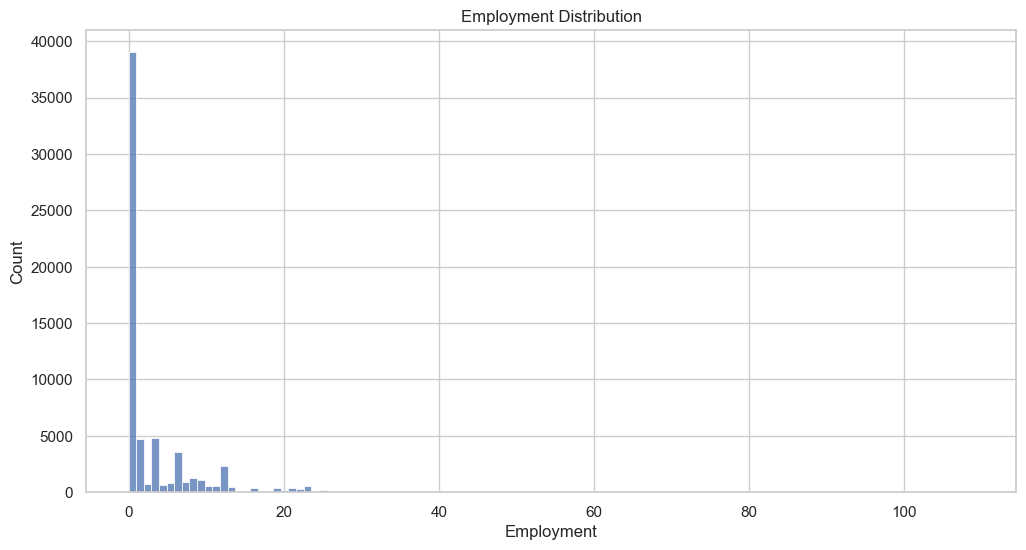

In [48]:
basic_info("Employment")


# mapping the Employment column
print(map_and_fill("Employment"))
df['Employment'] = df['Employment'].fillna(0)
# plot distribution of Employment column

bin_distribution("Employment", bins=len(df['Employment'].unique())+1)



In [49]:
# categorical data, a lot null values
#TODO need to expand
basic_info('LearnCode')
basic_info('CodingActivities')
basic_info('LearnCodeOnline')
basic_info('TechDoc')


ResponseId
1                               Books / Physical media
2    Books / Physical media;Colleague;On the job tr...
3    Books / Physical media;Colleague;On the job tr...
4    Other online resources (e.g., videos, blogs, f...
5    Other online resources (e.g., videos, blogs, f...
Name: LearnCode, dtype: object
----------------------------------------
ResponseId
65433    On the job training;School (i.e., University, ...
65434                                                  NaN
65435    Other online resources (e.g., videos, blogs, f...
65436    On the job training;Other online resources (e....
65437                                                  NaN
Name: LearnCode, dtype: object
----------------------------------------
4949
----------------------------------------
LearnCode
Other online resources (e.g., videos, blogs, forum, online community)                                                                                                 3674
Books / Physical media;Other online r

ResponseId
1    NaN
2     20
3     37
4      4
5      9
Name: YearsCode, dtype: object
----------------------------------------
ResponseId
65433      5
65434    NaN
65435      9
65436      5
65437    NaN
Name: YearsCode, dtype: object
----------------------------------------
5568
----------------------------------------
YearsCode
10                    4561
5                     3723
6                     3496
8                     3449
7                     3333
4                     3290
15                    2813
20                    2636
12                    2559
3                     2518
9                     2251
14                    1822
25                    1671
2                     1642
11                    1636
13                    1477
30                    1461
16                    1401
18                    1228
17                    1038
40                     993
24                     870
22                     842
35                     735
1                   

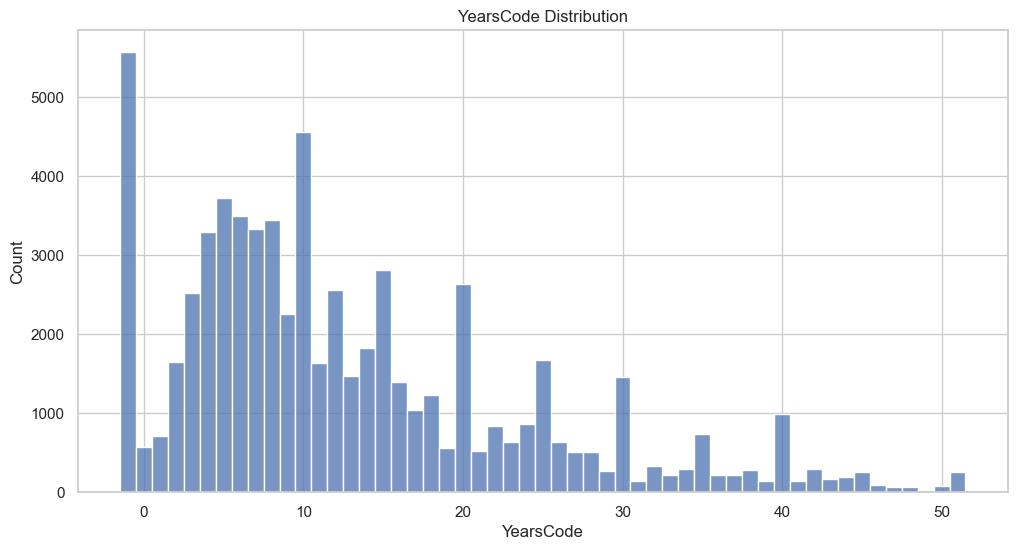

In [50]:
basic_info('YearsCode')
# 2 unique string values 'Less than 1 year' and 'More than 50 years'
# convert them to 0 and 51
df['YearsCode'] = df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
basic_info("YearsCode")
# need to handle the null values
df['YearsCode'] = df['YearsCode'].fillna(-1)
bin_distribution('YearsCode', bins=52)

ResponseId
1    NaN
2     17
3     27
4    NaN
5    NaN
Name: YearsCodePro, dtype: object
----------------------------------------
ResponseId
65433      3
65434    NaN
65435      5
65436      2
65437    NaN
Name: YearsCodePro, dtype: object
----------------------------------------
13827
----------------------------------------
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22        

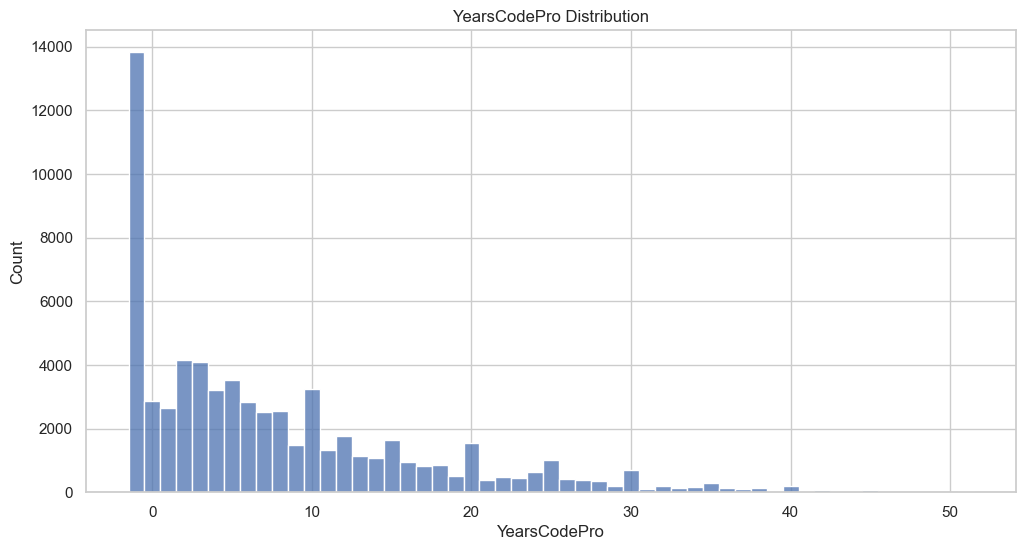

In [51]:
basic_info('YearsCodePro')
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
basic_info("YearsCodePro")
# need to handle the null values
df['YearsCodePro'] = df['YearsCodePro'].fillna(-1)

bin_distribution('YearsCodePro', bins=52)

ResponseId
1                      NaN
2    Developer, full-stack
3     Developer Experience
4    Developer, full-stack
5    Developer, full-stack
Name: DevType, dtype: object
----------------------------------------
ResponseId
65433             Blockchain
65434                    NaN
65435      Developer, mobile
65436    Developer, back-end
65437                    NaN
Name: DevType, dtype: object
----------------------------------------
5992
----------------------------------------
DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic 

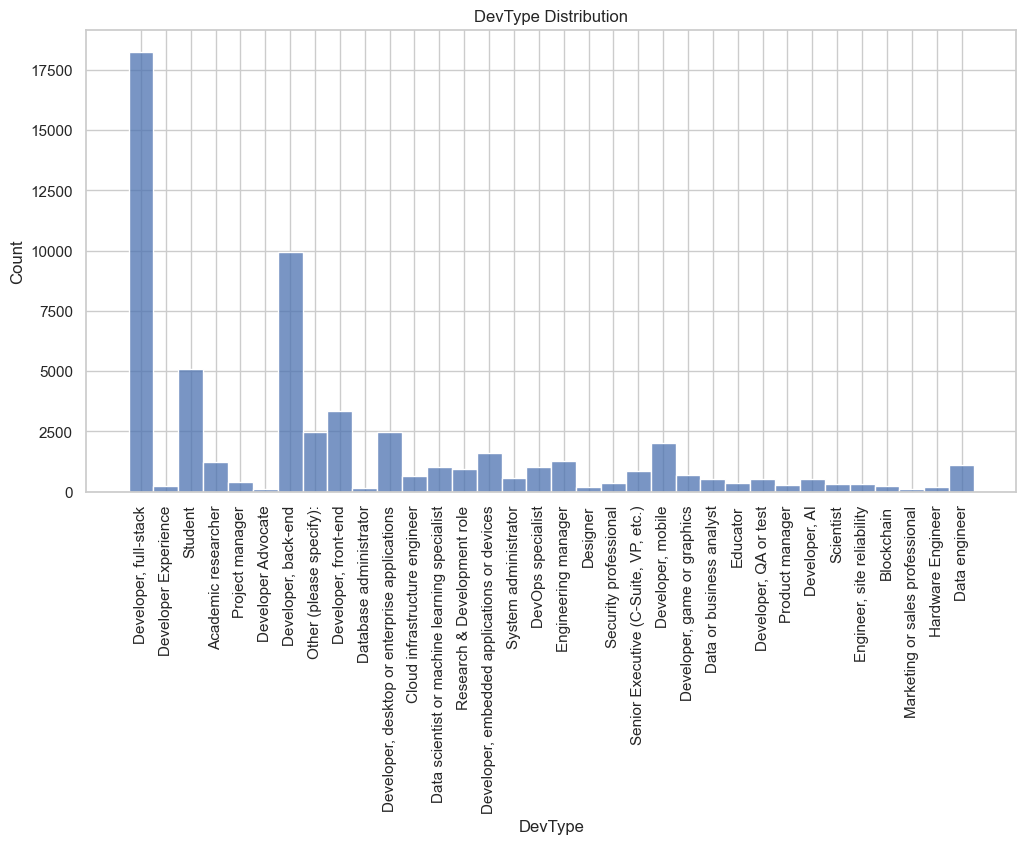

{'Developer, full-stack': 0, 'Developer Experience': 1, 'Student': 2, 'Academic researcher': 3, 'Project manager': 4, 'Developer Advocate': 5, 'Developer, back-end': 6, 'Other (please specify):': 7, 'Developer, front-end': 8, 'Database administrator': 9, 'Developer, desktop or enterprise applications': 10, 'Cloud infrastructure engineer': 11, 'Data scientist or machine learning specialist': 12, 'Research & Development role': 13, 'Developer, embedded applications or devices': 14, 'System administrator': 15, 'DevOps specialist': 16, 'Engineering manager': 17, 'Designer': 18, 'Security professional': 19, 'Senior Executive (C-Suite, VP, etc.)': 20, 'Developer, mobile': 21, 'Developer, game or graphics': 22, 'Data or business analyst': 23, 'Educator': 24, 'Developer, QA or test': 25, 'Product manager': 26, 'Developer, AI': 27, 'Scientist': 28, 'Engineer, site reliability': 29, 'Blockchain': 30, 'Marketing or sales professional': 31, 'Hardware Engineer': 32, 'Data engineer': 33}


In [52]:
basic_info("DevType")
bin_distribution('DevType', bins=df['DevType'].nunique()+1,rotate=90)
print(map_and_fill("DevType"))
df['DevType'] = df['DevType'].fillna(-1)




ResponseId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: OrgSize, dtype: object
----------------------------------------
ResponseId
65433            2 to 9 employees
65434                         NaN
65435    1,000 to 4,999 employees
65436          20 to 99 employees
65437                         NaN
Name: OrgSize, dtype: object
----------------------------------------
17957
----------------------------------------
OrgSize
20 to 99 employees                                    9754
100 to 499 employees                                  8694
10,000 or more employees                              5558
1,000 to 4,999 employees                              5353
2 to 9 employees                                      4833
10 to 19 employees                                    4084
500 to 999 employees                                  3183
Just me - I am a freelancer, sole proprietor, etc.    3086
5,000 to 9,999 employees                              1867
I don’t know                         

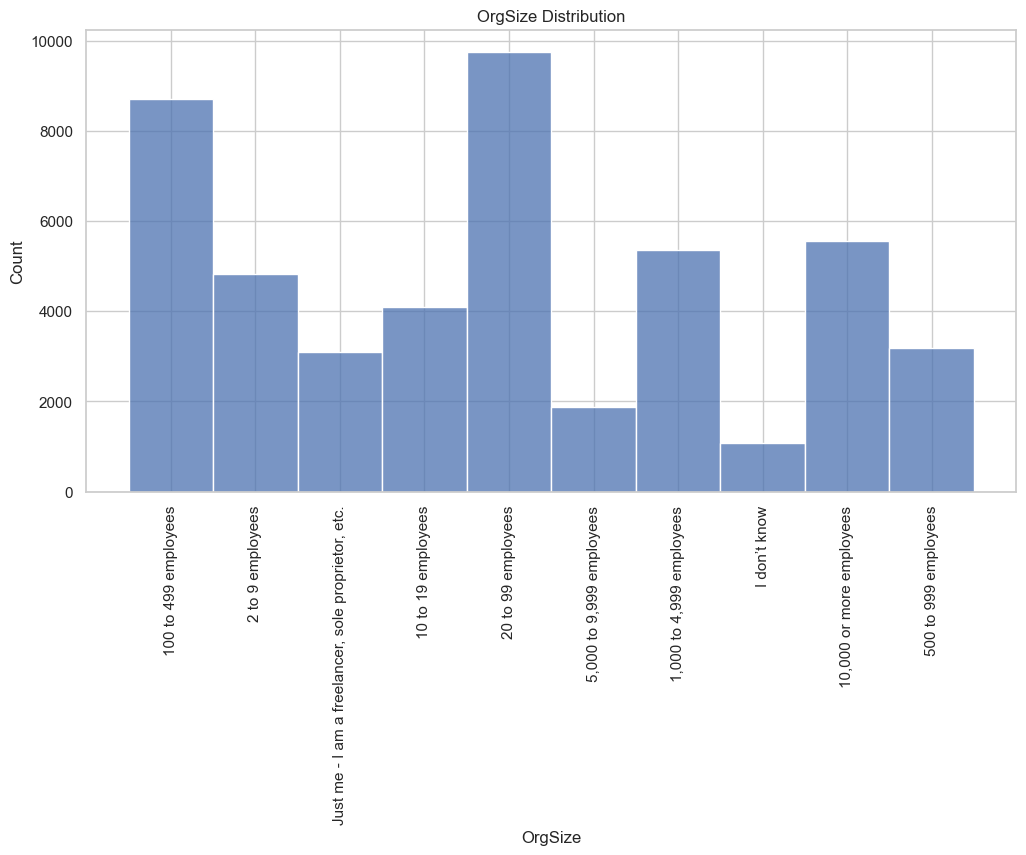

{'100 to 499 employees': 0, '2 to 9 employees': 1, 'Just me - I am a freelancer, sole proprietor, etc.': 2, '10 to 19 employees': 3, '20 to 99 employees': 4, '5,000 to 9,999 employees': 5, '1,000 to 4,999 employees': 6, 'I don’t know': 7, '10,000 or more employees': 8, '500 to 999 employees': 9}


In [53]:
basic_info("OrgSize")
bin_distribution('OrgSize', bins=df['OrgSize'].nunique()+1,rotate=90)
# categorical data, a lot null values, fill null with -1 meaning no response/don't have an organization?
print(map_and_fill("OrgSize"))
df['OrgSize'] = df['OrgSize'].fillna(-1)




In [54]:
basic_info("PurchaseInfluence")
# categorical data, a lot null values, fill null with -1 meaning no response/don't have an influence
print(map_and_fill("PurchaseInfluence"))
df['PurchaseInfluence'] = df['PurchaseInfluence'].fillna(-1)


ResponseId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: PurchaseInfluence, dtype: object
----------------------------------------
ResponseId
65433            I have some influence
65434                              NaN
65435    I have little or no influence
65436            I have some influence
65437                              NaN
Name: PurchaseInfluence, dtype: object
----------------------------------------
18031
----------------------------------------
PurchaseInfluence
I have some influence               19197
I have little or no influence       17942
I have a great deal of influence    10267
Name: count, dtype: int64
----------------------------------------
****************************************
{'I have some influence': 0, 'I have little or no influence': 1, 'I have a great deal of influence': 2}


In [55]:
#TODO here
basic_info("BuyNewTool")# another need to expand categorial data

basic_info('BuildvsBuy')
# don't plot this for the name is so long
# mapping the BuildvsBuy column
print(map_and_fill("BuildvsBuy"))
# filling null values with -1, meaning?
#TODO meaning?
df['BuildvsBuy'] = df['BuildvsBuy'].fillna(-1)



ResponseId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: BuyNewTool, dtype: object
----------------------------------------
ResponseId
65433    Ask developers I know/work with;Ask a generati...
65434                                                  NaN
65435    Ask developers I know/work with;Ask a generati...
65436    Start a free trial;Ask developers I know/work ...
65437                                                  NaN
Name: BuyNewTool, dtype: object
----------------------------------------
20256
----------------------------------------
BuyNewTool
Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow                                                               6619
Start a free trial;Ask developers I know/work with                                                                                                               4927
Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Rea

Salary relative columns & EDA

In [56]:
import re
# 1) Find compensation-related columns by name pattern
pattern = re.compile(r"(comp|salary|pay|income|bonus|stock|currency|converted)", re.IGNORECASE)
salary_cols = [c for c in df.columns if pattern.search(c)]

print("Salary-related columns found:")
for c in salary_cols:
    print(" •", c)

Salary-related columns found:
 • Currency
 • CompTotal
 • AIComplex
 • ConvertedCompYearly


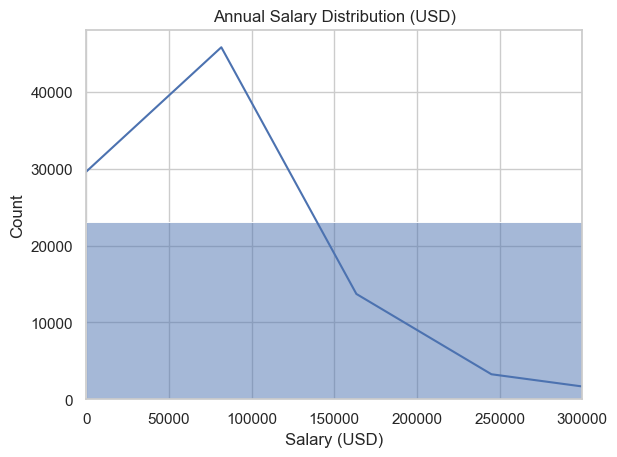

In [57]:
# 查看薪资分布
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title("Annual Salary Distribution (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.xlim(0, 300000)  # 去掉极端值
plt.show()

In [58]:
def profile_columns(frame, cols, schema=None, sample_n=5):
    rows = []
    for c in cols:
        s = frame[c]
        rows.append({
            "column": c,
            "dtype": str(s.dtype),
            "non_null": int(s.notna().sum()),
            "missing_%": round(float(s.isna().mean()*100), 2),
            "n_unique": int(s.nunique(dropna=True)),
            "sample_values": ", ".join(map(str, s.dropna().unique()[:sample_n]))
        })
    out = pd.DataFrame(rows).sort_values("column")
    if schema is not None:
        out = out.merge(schema[["column","question"]], on="column", how="left")
    return out

salary_profile = profile_columns(df, salary_cols, schema)
salary_profile

,column,dtype,non_null,missing_%,n_unique,sample_values
2,AIComplex,object,37021,43.42,5,"Bad at handling complex tasks, Good, but not g..."
1,CompTotal,float64,33740,48.44,3337,"2040000.0, 28000.0, 85000.0, 50000.0, 110000.0"
3,ConvertedCompYearly,float64,23435,64.19,6113,"7322.0, 30074.0, 91295.0, 53703.0, 110000.0"
0,Currency,object,46684,28.66,142,"PKR\tPakistani rupee, EUR European Euro, USD\t..."


Salary-related Columns Observation

From the profiling analysis, we identified four key columns that relate to salary information in the dataset.
通过字段概况分析，我们在数据库中找到了四个与收入相关的主要字段。

1️⃣ ConvertedCompYearly — This is the most important column, representing the respondent’s annual salary in USD.
It’s numeric and continuous, suitable for quantitative analysis. However, around 64% of values are missing, which means data cleaning or imputation might be necessary.
👉 这是最核心的薪资字段，表示受访者以美元计的年收入。
属于连续数值型变量，但约有 64% 的缺失值，需要在后续分析中进行数据清洗或填补。

2️⃣ CompTotal — Represents the respondent’s total compensation in local currency.
It has almost half missing values and likely overlaps with ConvertedCompYearly.
We can use this column to cross-check currency conversion consistency.
👉 表示受访者的本地货币总收入，缺失值接近 50%，与美元收入列可能存在重复信息。
这个字段可以用于验证汇率换算是否一致。

3️⃣ Currency — The reported currency type (e.g., USD, EUR, PKR, etc.).
There are 142 unique currencies, which shows this dataset includes a highly international respondent group.
👉 表示受访者使用的货币种类（如美元、欧元、巴基斯坦卢比等），共有 142 种不同币别，说明样本来源非常国际化。

4️⃣ AIComplex — A qualitative categorical column describing how respondents perceive the complexity of AI tasks (e.g., “Good at handling complex tasks”, “Bad at handling complex tasks”).
Though not a direct measure of salary, it may reflect respondents’ technical confidence or skill self-assessment, which could correlate with income.
👉 一个定性分类字段，描述受访者对 AI 任务复杂性的看法。
虽然不是直接的薪资指标，但可能反映他们的技术信心或能力自评，与收入存在潜在关系。

⸻

🧠 Summary / 总结

In short, among all salary-related variables,
➡️ ConvertedCompYearly will serve as the main salary variable for EDA,
while CompTotal and Currency provide context for conversion and regional comparison,
and AIComplex may be explored for behavioral or skill-related effects.

简而言之，在所有与薪资相关的变量中，
➡️ ConvertedCompYearly 将作为主要的收入分析变量，
CompTotal 和 Currency 可作为换算或地区对比的辅助信息，
AIComplex 则可用于探索技术能力或心理层面对收入的潜在影响。


In [59]:
df['ConvertedCompYearly'].isna().mean() * 100

np.float64(64.1869278848358)

Missing salary entries before filling: 42002
Missing salary entries after filling: 6543


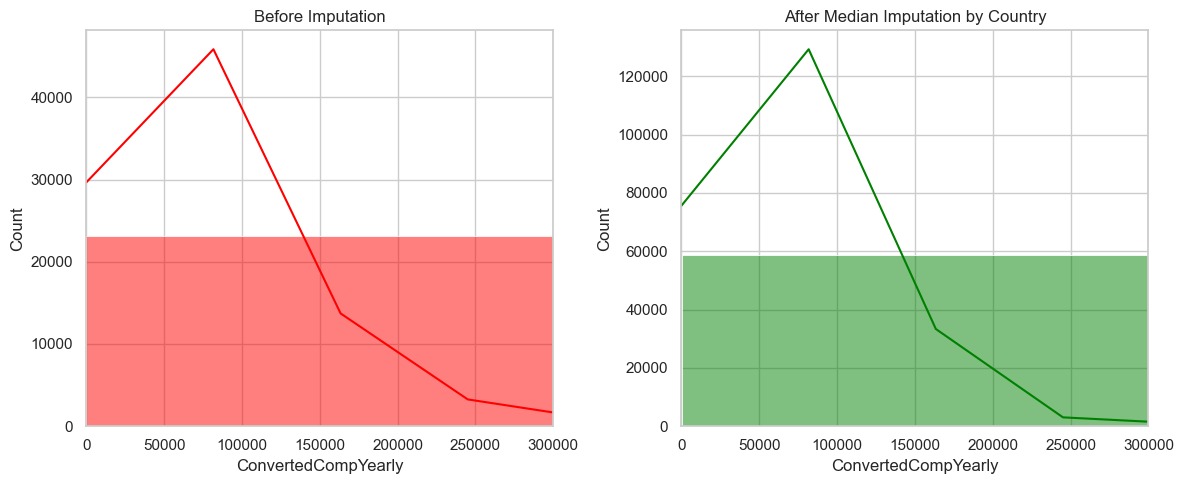

In [60]:
# --- Step 2: Salary Imputation (Filling missing values for ConvertedCompYearly) ---
# Objective: Instead of removing missing salaries, estimate (impute) them based on similar respondents.
# We'll use the median salary per COUNTRY, since income level strongly depends on location.

# Step 1: Check how many missing values exist before filling
missing_before = df['ConvertedCompYearly'].isna().sum()
print(f"Missing salary entries before filling: {missing_before}")

# Step 2: Apply median imputation by 'Country'
# We fill each missing salary with the median salary of respondents from the same country.
df_filled = df.copy()
df_filled['ConvertedCompYearly'] = (
    df_filled.groupby('Country')['ConvertedCompYearly']
    .transform(lambda x: x.fillna(x.median()))
)

# Step 3: Check if any missing values remain after imputation
missing_after = df_filled['ConvertedCompYearly'].isna().sum()
print(f"Missing salary entries after filling: {missing_after}")

# Step 4: Compare before/after imputation visually
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Original data (with missing values)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title("Before Imputation")
axes[0].set_xlim(0, 300000)

# Right plot: After imputation
sns.histplot(df_filled['ConvertedCompYearly'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title("After Median Imputation by Country")
axes[1].set_xlim(0, 300000)

plt.tight_layout()
plt.show()

# Step 5 (optional): You can now use df_filled for all future salary EDA
# Example: df_to_use = df_filled

Identify Satisfaction-related Columns

In [61]:
# === Find satisfaction-related columns ===
satisfaction_cols = [col for col in df.columns if re.search(r'Sat|Balance|Happiness|WellBeing', col, re.IGNORECASE)]
print("🔍 Satisfaction-related columns found:")
print(satisfaction_cols)

🔍 Satisfaction-related columns found:
['JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSat']


In [64]:
# Load schema metadata
schema = pd.read_csv("survey_results_schema.csv")
print(schema.columns)

Index(['qid', 'qname', 'question', 'force_resp', 'type', 'selector'], dtype='object')


In [65]:
# Look at satisfaction-related questions
schema[schema['qname'].str.contains('JobSat', case=False)][['qname', 'question']]

,qname,question
61,JobSat,How satisfied are you in your current professi...
62,JobSatPoints,Assign points to the following attributes of y...
78,JobSatPoints_1,Driving strategy for my team
79,JobSatPoints_4,Contributing to open source
80,JobSatPoints_5,Securing data and environments
81,JobSatPoints_6,Improving quality of code and developer enviro...
82,JobSatPoints_7,"Learning and using new technology, including p..."
83,JobSatPoints_8,"Designing and building environments, databases..."
84,JobSatPoints_9,"Being a power user of a tool, developer langua..."
85,JobSatPoints_10,Working with new and/or top-quality hardware


In [66]:
# --- Collect satisfaction factor columns (JobSatPoints_1..11) ---
job_sat_points = [c for c in df.columns if c.startswith("JobSatPoints_")]
assert len(job_sat_points) > 0, "No JobSatPoints_* columns found."

# --- Coerce to numeric (in case they are strings) ---
df[job_sat_points] = df[job_sat_points].apply(pd.to_numeric, errors="coerce")

# Optional: keep only rows with at least one factor filled
df_fac = df[job_sat_points].dropna(how="all").copy()

/var/folders/vk/wh57zgsj4dgdmfrh2qvbyyy80000gn/T/ipykernel_28146/139450235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_means.values, y=factor_means.index, palette="viridis")


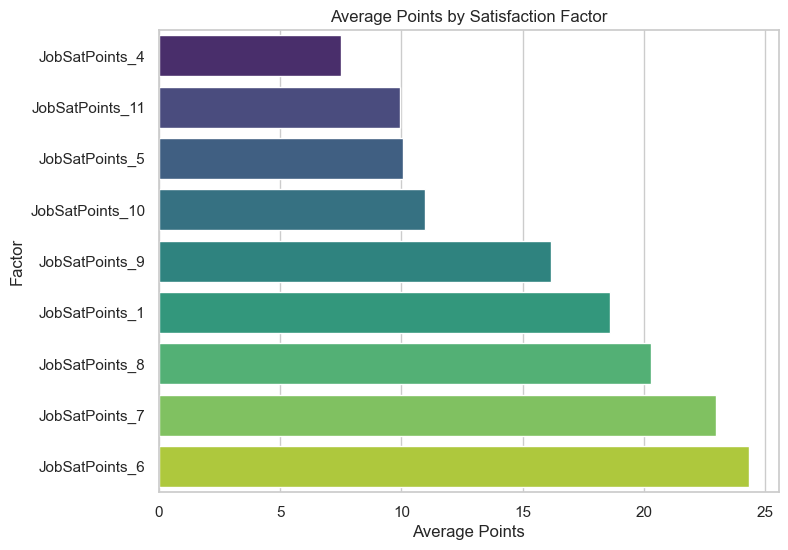

In [67]:
# --- Mean points per factor (ignoring NaNs) ---
factor_means = df_fac.mean().sort_values(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=factor_means.values, y=factor_means.index, palette="viridis")
plt.title("Average Points by Satisfaction Factor")
plt.xlabel("Average Points")
plt.ylabel("Factor")
plt.show()

This bar chart visualizes the average satisfaction points assigned to each sub-factor of job satisfaction.
We can see that:
	•	JobSatPoints_6, JobSatPoints_7, and JobSatPoints_8 receive the highest average scores (around 20–24 points).
→ These likely correspond to areas such as “Improving code quality,” “Learning new technologies,” and “Designing and building environments.”
→ It suggests that developers value professional growth, technical excellence, and continuous learning the most.
	•	Factors like JobSatPoints_4 and JobSatPoints_11 have noticeably lower averages (around 8–10 points).
→ These relate to “Contributing to open source” and “Internal network support.”
→ Such aspects are seen as less critical to overall satisfaction.

✅ Insight:
Developers’ job satisfaction is primarily driven by technical challenge and learning opportunities, rather than peripheral aspects like open-source contribution or internal infrastructure.

Employer / Manager Satisfaction Analysis

In [71]:
# Find columns related to management or employer perspective
pattern_mgr = re.compile(r"(mgr|manage|lead|org|influence|purchase|team|size)", re.IGNORECASE)
mgr_cols = [c for c in df.columns if pattern_mgr.search(c)]
print("Management-related columns found:")
for c in mgr_cols:
    print(" •", c)

Management-related columns found:
 • OrgSize
 • PurchaseInfluence


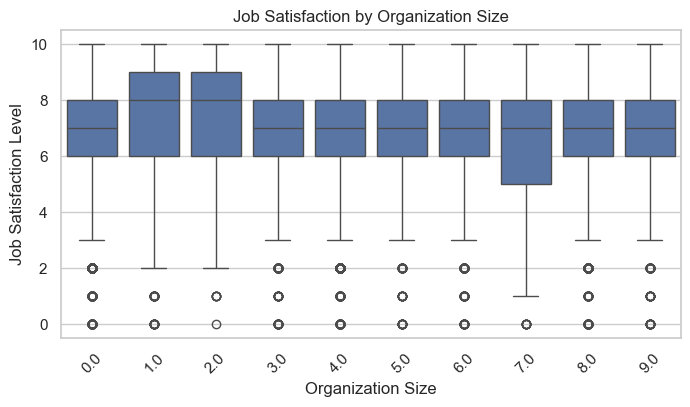

In [72]:
# === Step 2: Organization size vs satisfaction ===
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='OrgSize', y='JobSat')
plt.title("Job Satisfaction by Organization Size")
plt.xticks(rotation=45)
plt.xlabel("Organization Size")
plt.ylabel("Job Satisfaction Level")
plt.show()